In [1]:
# Import required libraries and dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [5]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
scaled_df = pd.DataFrame(scaled_data,columns=[market_data_df.columns])

# Set the coinid column as index
scaled_df.set_index(market_data_df.index,inplace=True)

# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_list = range(1,12)


# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_list:
    model = KMeans(n_clusters=k,n_init="auto")
    model.fit(scaled_df.values)
    inertia_values.append(model.inertia_)





# Create a dictionary with the data to plot the Elbow curve
model_inertia_data = {"K":k_list,"inertia":inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
inertia_df = pd.DataFrame(model_inertia_data)
# Display the DataFrame
print(inertia_df)


     K     inertia
0    1  287.000000
1    2  235.816943
2    3  134.771757
3    4   79.022435
4    5   72.092550
5    6   55.718576
6    7   44.550278
7    8   40.954653
8    9   34.252630
9   10   29.377684
10  11   25.536292


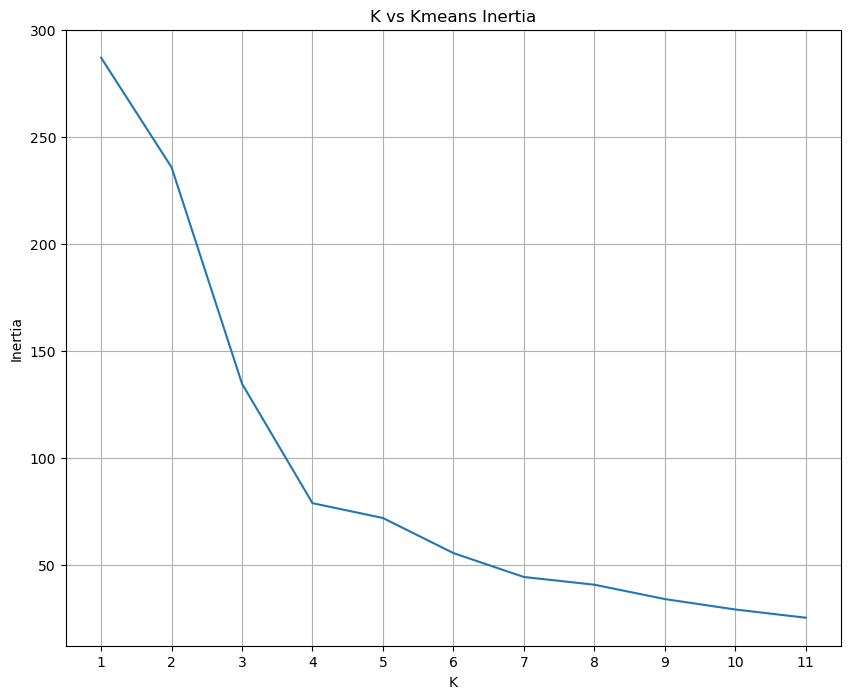

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10,8))
plt.plot(inertia_df["K"],inertia_df["inertia"])
plt.title("K vs Kmeans Inertia")
plt.ylabel("Inertia")
plt.xlabel("K")
plt.xticks(k_list)
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4,n_init="auto")


In [9]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df.values)

KMeans(n_clusters=4, n_init='auto')

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(scaled_df.values)

# View the resulting array of cluster values.
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [11]:
# Create a copy of the DataFrame
copy_scaled_df = scaled_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
copy_scaled_df["cluster"] = clusters

# Display sample data
print(copy_scaled_df.cluster)


                     cluster
coin_id                     
bitcoin                    0
ethereum                   0
tether                     2
ripple                     2
bitcoin-cash               0
binancecoin                0
chainlink                  0
cardano                    0
litecoin                   0
bitcoin-cash-sv            2
crypto-com-chain           2
usd-coin                   2
eos                        2
monero                     0
tron                       2
tezos                      0
okb                        2
stellar                    2
cosmos                     0
cdai                       2
neo                        2
wrapped-bitcoin            0
leo-token                  2
huobi-token                2
nem                        2
binance-usd                2
iota                       2
vechain                    2
zcash                      0
theta-token                2
dash                       2
ethereum-classic           2
ethlend       

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

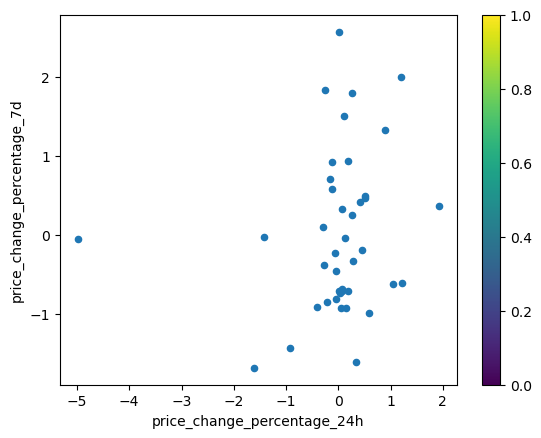

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
pd.options.plotting.backend = 'matplotlib'
copy_scaled_df.plot(x="price_change_percentage_24h",y="price_change_percentage_7d",colorbar="rainbow",kind="scatter")


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df.values)
pca_df = pd.DataFrame(pca_data,columns=["PC1","PC2","PC3"],index=market_data_df.index)

# View the first five rows of the DataFrame. 
(pca_df.head())

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.6689967  2.48978331 1.26307212]
[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Almost 89.5%

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
new_pca_df = pd.DataFrame(pca_data)

# Copy the crypto names from the original data
new_pca_df.columns = ["PC1","PC2","PC3"]

# Set the coinid column as index
new_pca_df.set_index(market_data_df.index,inplace=True)

# Display sample data
new_pca_df

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_range = range(1,12)

# Create an empty list to store the inertia values
pca_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_range:
    model = KMeans(n_clusters=k,n_init="auto")
    model.fit(new_pca_df.values)
    pca_inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_inertia = {"K":k_range,"Inertia":pca_inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_inertia)

# Display the DataFrame
pca_elbow_df

,K,Inertia
0,1,256.874086
1,2,168.811896
2,3,135.491787
3,4,49.665497
4,5,38.352251
5,6,34.966186
6,7,21.276670
7,8,17.091637
8,9,14.772817
9,10,10.572380


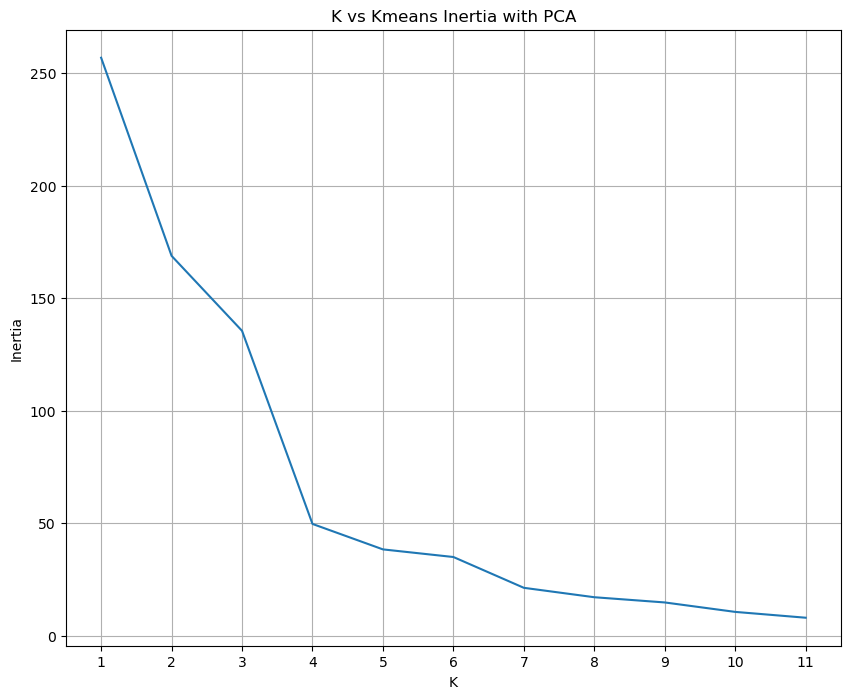

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10,8))
plt.plot(pca_elbow_df["K"],pca_elbow_df["Inertia"])
plt.title("K vs Kmeans Inertia with PCA")
plt.ylabel("Inertia")
plt.xlabel("K")
plt.xticks(k_list)
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** K is 5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, we observed with the original data, the optimal K values is 5, and now with using PCA we get it 5.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5,n_init="auto")

In [21]:
# Fit the K-Means model using the PCA data
model.fit(pca_df.values)


KMeans(n_clusters=5, n_init='auto')

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = model.predict(pca_df.values)

# Print the resulting array of cluster values.
print(clusters)

[4 4 0 0 4 4 4 4 4 0 0 0 0 4 0 4 0 0 4 0 0 4 0 0 3 0 0 0 4 3 0 0 2 4 0 3 1
 0 0 0 0]


In [23]:
# Create a copy of the DataFrame with the PCA data
copy_pca_df = pca_df.copy()
copy_pca_df.rename(columns={"PC1":"PCA1","PC2":"PCA2","PC3":"PCA3"},inplace=True)
# Add a new column to the DataFrame with the predicted clusters
copy_pca_df["clusters"] = clusters

# Display sample data
copy_pca_df

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,4
ethereum,-0.458261,0.458466,0.952877,4
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,4
binancecoin,-0.516534,1.388377,0.804071,4
chainlink,-0.450711,0.517699,2.846143,4
cardano,-0.345600,0.729439,1.478013,4
litecoin,-0.649468,0.432165,0.600303,4


In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas 
pd.options.plotting.backend = 'holoviews'
copy_pca_df.plot(kind="scatter",x="PCA1",y="PCA2")

:Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.
pca_components = pca.components_
indexes = ["PC1","PC2","PC3"]
components_weights = pd.DataFrame(pca_components,columns=scaled_df.columns,index=indexes)
components_weights

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

    **PC1**
    Strongest Positive : price_change_percentage_200d
    Strongest Negative : price_change_percentage_24h

    **PC2**
    Strongest Positive : price_change_percentage_30d
    Strongest Negative : price_change_percentage_1y
    
    **PC3**
    Strongest Positive : price_change_percentage_7d
    Strongest Negative : price_change_percentage_60d
